In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [19]:
def RK4(f, y0, t, args=()):
    n = len(t)
    y = np.zeros((n,len(y0)))
    y[0] = y0

    for i in range(n - 1):
        h = t[i + 1] - t[i]
        k1 = f(y[i], t[i], *args)
        k2 = f(y[i] + k1 * h / 2.0, t[i] + h / 2.0, *args)
        k3 = f(y[i] + k2 * h / 2.0, t[i] + h / 2.0, *args)
        k4 = f(y[i] + k3 * h, t[i] + h, *args)
        y[i + 1] = y[i] + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return y

def myFun(u,t=0,a = a,b= b):
    x = u[0]
    y = u[1]
    d = 1/(1+x**2)
    dx = a - x - (4*x*y)*d
    dy = b*x*(1-y*d)
    return np.array([dx,dy])



bc =  3.5


Text(0, 0.5, 'y')

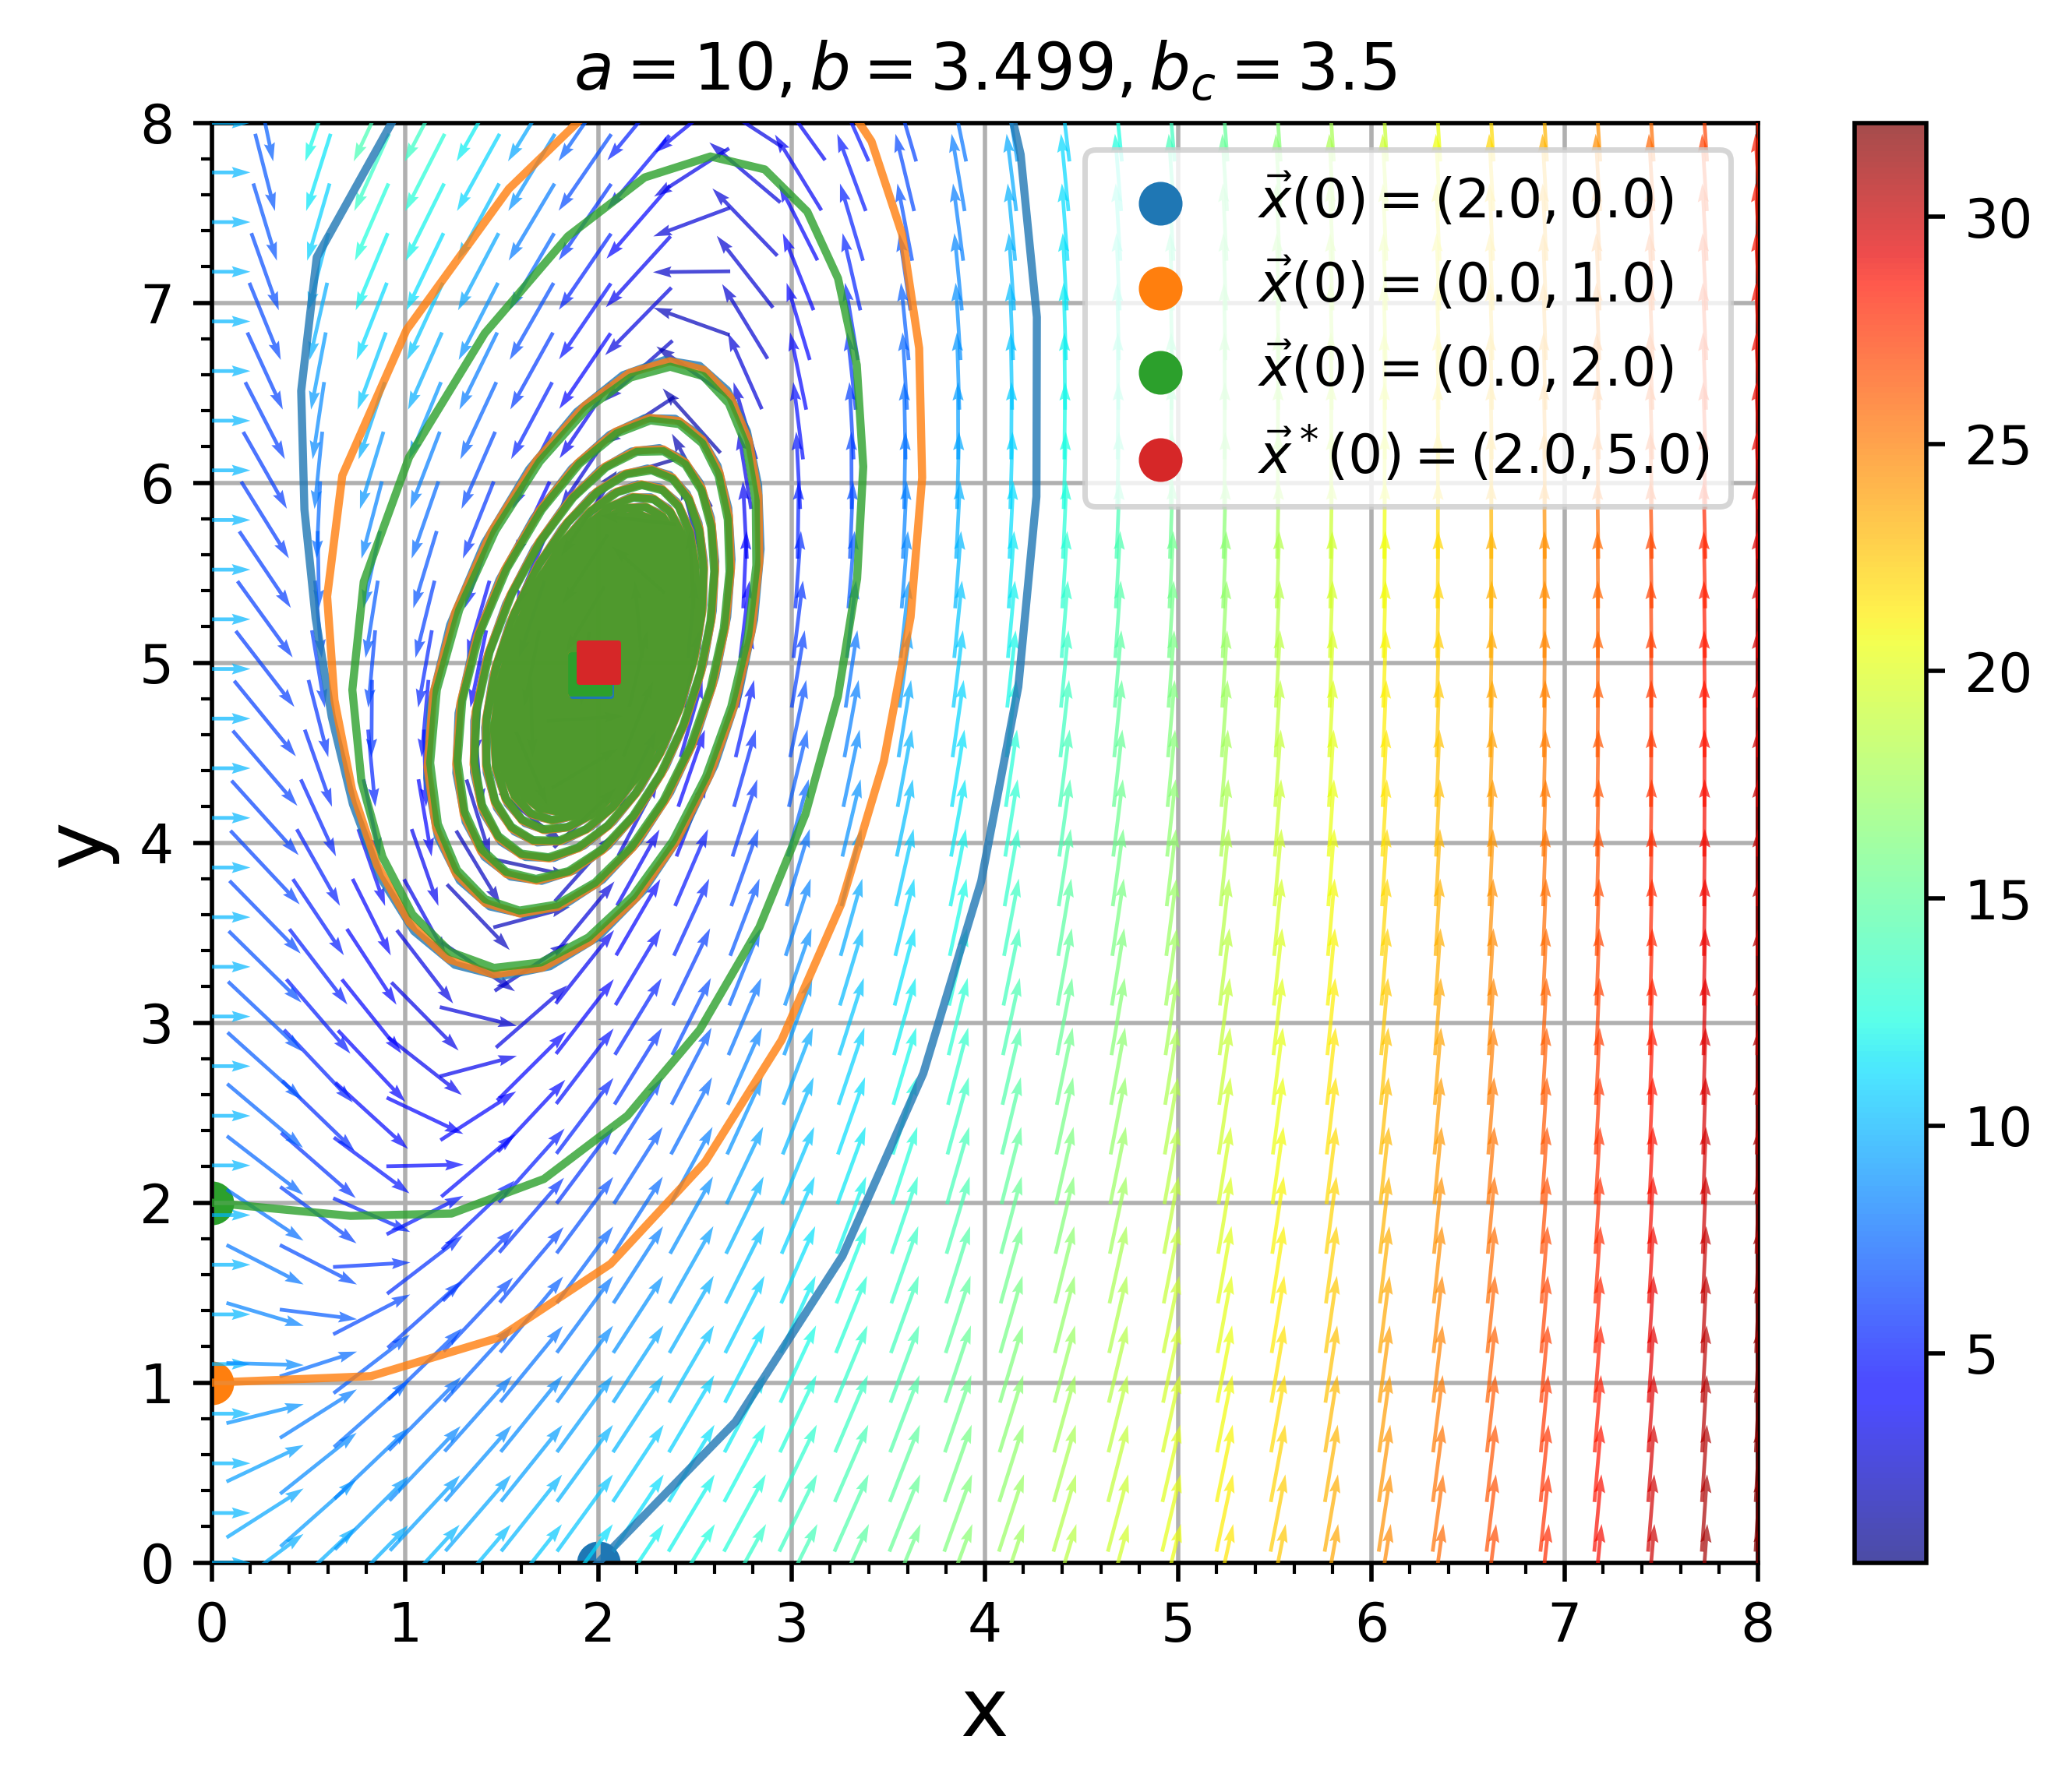

In [59]:
a = 10
b = 3.499
bc = 3*a/5 - 25/a
print('bc = ',bc)
u0 = [0,2]
t = np.arange(0,6000,0.1)
x = np.linspace(0,3,5)
y = np.linspace(0,0,1)
X,Y = np.meshgrid(x,y)
fx = a/5 +1e-3
fy = 1+ (a/5)**2 +1e-3
u0s = [[2,0],[0,1],[0,2],[fx,fy]]
# u0s = [[x_,y_] for x_,y_ in zip(X.flatten(),Y.flatten()) ]
plt.figure(dpi=500)
for i,u0 in enumerate(u0s):

	u = RK4(myFun,np.array(u0,dtype=float),t,args=(a,b))
	if i == 3:
		c = plt.scatter(u[0,0],u[0,1],s=50,label=r'$\vec{x}^*(0)=(%.1f,%.1f)$'%(u0[0],u0[1]))
	else:	
		c = plt.scatter(u[0,0],u[0,1],s=50,label=r'$\vec{x}(0)=(%.1f,%.1f)$'%(u0[0],u0[1]))
	plt.scatter(u[-1,0],u[-1,1],s=50,marker='s',zorder=7,color=c.get_facecolor())
	plt.plot(u[:,0],u[:,1],lw=1.5,alpha=0.8,zorder=6)#,label=r'$\vec{x}(0)=(%.1f,%.1f)$'%(u0[0],u0[1]))

plt.legend()
x = np.linspace(0,8,30)
y = np.linspace(0,8,30)
X,Y = np.meshgrid(x,y)

U,V = myFun([X,Y],0)
M = (np.hypot(U,V))
# U = U / np.sqrt(U**2 + V**2);
# V = V / np.sqrt(U**2 + V**2);


xs = np.linspace(-3,-1e-5,1000)
U = U / np.sqrt(U**2 + V**2);
V = V / np.sqrt(U**2 + V**2);

# plt.axhline(0,color='black')
# plt.plot(xs,-np.log(-xs),color='black')
# plt.plot(x,xdot(x,y))
Q = plt.quiver(x,y,U,V,M,scale=20,pivot='mid',cmap='jet',zorder=3,alpha=0.7)
plt.colorbar()
plt.xlim(0,8)
plt.ylim(0,8)
# plt.legend()
ax =plt.gca()
xs = np.linspace(-10,10,1000)
# plt.plot(xs,F(xs))
ax.grid(True)
ax.minorticks_on()
plt.title(rf'$a={a},b={b},b_c={bc}$')
# plt.plot(-1,0,'o',ms=10,markeredgewidth=2,markerfacecolor='white')
plt.xlabel('x',fontsize=15)
plt.ylabel('y',fontsize=15)
# plt.legend()

# qk = plt.quiverkey(Q, 0.9, 0.9, 1, r'$2 \frac{m}{s}$', labelpos='E',
#                    coordinates='figure')

